<a href="https://colab.research.google.com/github/yamini542/AppliedAI_Assignments/blob/main/AppliedAi_ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing necessary libraries
!pip install pmdarima

import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 40.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
!pip install --upgrade --q --no-cache-dir gdown
!gdown 1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp
#loading the data set from the guthub link
df=pd.read_csv('PT_Train.csv')

Downloading...
From: https://drive.google.com/uc?id=1NQ2yc8L-XvMCML2-qoHuTNb5xvERF5mp
To: /content/PT_Train.csv
100% 7.17k/7.17k [00:00<00:00, 7.74MB/s]


In [3]:
df.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,191.000000,191.000000
mean,2315.615044,2219.216814,83.450262,126.335079
std,11351.588825,11370.093548,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,145.000000,46.000000,93.000000,139.000000
75%,156.000000,53.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [5]:
#Impute missing values with a suitable value (e.g. the mean)
df["Oximeter SpO2"].fillna(df["Oximeter SpO2"].mean(), inplace=True)
df["Oximeter Pulse"].fillna(df["Oximeter Pulse"].mean(), inplace=True)

In [6]:
#here we are replacing the negative values 
df=df.replace(-1, np.nan, inplace=False)

In [7]:
#handling-outliers: here for the heart rate we have consider the values which are between 40-200 as we know that 
df = df[(df['Lifetouch Heart Rate'] > 40) & (df['Lifetouch Heart Rate'] < 200)]

In [8]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value}')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [9]:
check_stationarity(df['Lifetouch Heart Rate'])


p value: 0.01
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [10]:
#add new column 'Log-Sales' with log transformed values
df1=df[['Timestamp (GMT)','Lifetouch Heart Rate']].copy()

In [16]:
df1['Timestamp (GMT)'] = pd.to_datetime(df1['Timestamp (GMT)'])

In [17]:
df1

,Timestamp (GMT),Lifetouch Heart Rate
0,2015-08-17 15:09:00,139
1,2015-08-17 15:10:00,144
2,2015-08-17 15:11:00,140
3,2015-08-17 15:12:00,138
4,2015-08-17 15:13:00,133
...,...,...
221,2015-08-17 18:50:00,159
222,2015-08-17 18:51:00,151
223,2015-08-17 18:52:00,140
224,2015-08-17 18:53:00,140


In [19]:
df1.set_index('Timestamp (GMT)', inplace=True)


In [20]:
from pmdarima import auto_arima



# Fit an ARIMA model to the dataset
model = auto_arima(df1['Lifetouch Heart Rate'], seasonal=True, suppress_warnings=True, stepwise=True)

# Print the optimal order of p, d, q
print(model.order)
model.summary()

(0, 1, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  218
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -649.163
Date:                Thu, 09 Feb 2023   AIC                           1302.325
Time:                        10:13:32   BIC                           1309.085
Sample:                             0   HQIC                          1305.056
                                - 218                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4090      0.032    -12.976      0.000      -0.471      -0.347
sigma2        23.2044      0.955     24.296      0.000      21.332      25.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1528.16
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -1.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(df1['Lifetouch Heart Rate'], order=(0, 1, 1))
model_First = model_1.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
from statsmodels.tsa.arima.model import ARIMA

model_1 = ARIMA(df1[:218], order=(0, 1, 1))
model_First = model_1.fit()
print(model_First.summary())

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                   ARIMA(0, 1, 1)   Log Likelihood                -649.163
Date:                  Thu, 09 Feb 2023   AIC                           1302.325
Time:                          10:13:55   BIC                           1309.085
Sample:                               0   HQIC                          1305.056
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4090      0.032    -12.976      0.000      -0.471      -0.347
sigma2        23.2044      0.955     24.296      0.000      21.332      25.076
Ljung-Box (L1) (Q):                 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In this case, based on the low AIC, BIC and HQIC values and the low P-values for the Ljung-Box and Jarque-Bera tests, the ARIMA(0,1,1) model appears to be a good fit for the data. However, it's always recommended to check the residuals and other diagnostics plots to make sure the model is well-specified.

In [23]:
model_1 = ARIMA(df1, order=(0, 1, 1))

model= model_1.fit()

# Predict the next quarter of 1961
predictions= model.predict(start=len(df1), end=len(df1)+20)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
predictions

218    139.763077
219    139.763077
220    139.763077
221    139.763077
222    139.763077
223    139.763077
224    139.763077
225    139.763077
226    139.763077
227    139.763077
228    139.763077
229    139.763077
230    139.763077
231    139.763077
232    139.763077
233    139.763077
234    139.763077
235    139.763077
236    139.763077
237    139.763077
238    139.763077
Name: predicted_mean, dtype: float64

In [28]:
print(model.summary())
residuals = model.resid



                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                   ARIMA(0, 1, 1)   Log Likelihood                -649.163
Date:                  Thu, 09 Feb 2023   AIC                           1302.325
Time:                          10:19:48   BIC                           1309.085
Sample:                               0   HQIC                          1305.056
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4090      0.032    -12.976      0.000      -0.471      -0.347
sigma2        23.2044      0.955     24.296      0.000      21.332      25.076
Ljung-Box (L1) (Q):                 

In [29]:
residuals

Timestamp (GMT)
2015-08-17 15:09:00    139.000000
2015-08-17 15:10:00      5.001319
2015-08-17 15:11:00     -2.247455
2015-08-17 15:12:00     -2.897783
2015-08-17 15:13:00     -6.180701
                          ...    
2015-08-17 18:50:00      2.779995
2015-08-17 18:51:00     -6.862853
2015-08-17 18:52:00    -13.807226
2015-08-17 18:53:00     -5.647797
2015-08-17 18:54:00     -4.310211
Length: 218, dtype: float64

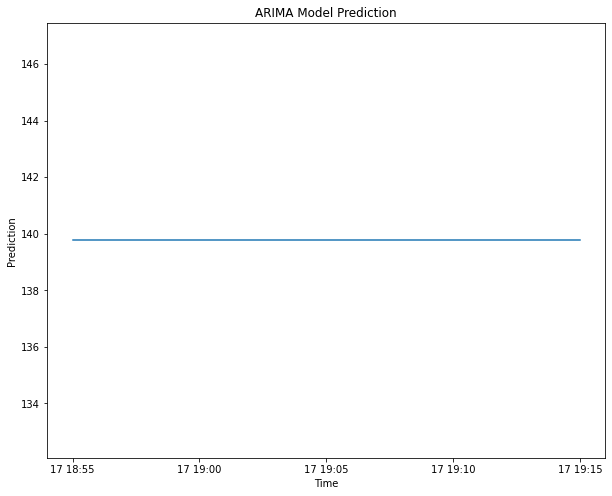

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

next_minutes= pd.date_range(start='2015-08-17 18:55:00', periods=21, freq='T')
predictions.index = next_minutes
# Plot the predictions
plt.plot(predictions)

plt.xlabel('Time')
plt.ylabel('Prediction')
plt.title('ARIMA Model Prediction')
plt.show()

In [25]:
df1.info# Fit the ARMA model
model_11 = ARIMA(df1, order=(1, 0, 1))

model1= model_11.fit()

# Predict the next quarter of 1961
predictions_1 = model1.predict(start=len(df1), end=len(df1)+20)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
predictions_1

218    139.866455
219    140.062151
220    140.250067
221    140.430511
222    140.603782
223    140.770163
224    140.929929
225    141.083343
226    141.230657
227    141.372115
228    141.507948
229    141.638381
230    141.763627
231    141.883895
232    141.999380
233    142.110274
234    142.216759
235    142.319010
236    142.417196
237    142.511478
238    142.602012
Name: predicted_mean, dtype: float64

In [45]:
print(model1.summary())
residuals = model1.resid


                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                   ARIMA(1, 0, 1)   Log Likelihood                -650.654
Date:                  Thu, 09 Feb 2023   AIC                           1309.308
Time:                          10:59:12   BIC                           1322.846
Sample:                               0   HQIC                          1314.776
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.7886      5.450     26.568      0.000     134.107     155.470
ar.L1          0.9602      0.022     43.376      0.000       0.917       1.004
ma.L1         -0.3823      0.045    

IN this model (1,0,1) AIC and BIC values are relatively high, which suggests that there may be other models that better explain the data.

p,d,q=0,1,1 is the best 

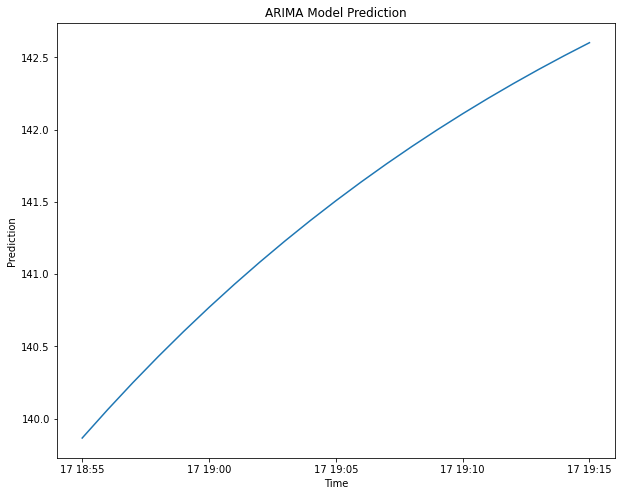

In [42]:
plt.figure(figsize=(10, 8))

next_minutes= pd.date_range(start='2015-08-17 18:55:00', periods=21, freq='T')
predictions_1.index = next_minutes
# Plot the predictions
plt.plot(predictions_1)

plt.xlabel('Time')
plt.ylabel('Prediction')
plt.title('ARIMA Model Prediction')
plt.show()

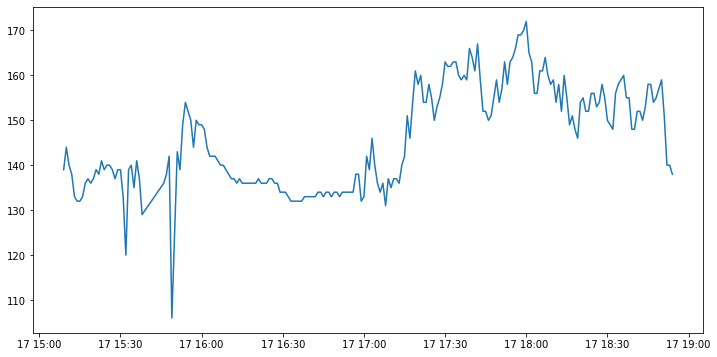

In [27]:

# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df1["Lifetouch Heart Rate"])
plt.show()

#model_2


In [70]:
model_2 = sm.tsa.statespace.SARIMAX(df1['Lifetouch Heart Rate'],
                                  order=(0, 1, 1),
                                  seasonal_order=(0, 0, 0, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
# train model
mode_2 = model_2.fit()
print(mode_2.summary())

                                SARIMAX Results                                 
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                 SARIMAX(0, 1, 1)   Log Likelihood                -643.651
Date:                  Thu, 09 Feb 2023   AIC                           1291.302
Time:                          11:41:51   BIC                           1298.043
Sample:                               0   HQIC                          1294.026
                                  - 218                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4055      0.032    -12.819      0.000      -0.468      -0.344
sigma2        23.3230      0.965     24.171      0.000      21.432      25.214
Ljung-Box (L1) (Q):                 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [71]:
# make predictions
predictions_2 = mode_2.predict(start=len(df1), end=len(df1)+20,dynamic=False)
print(predictions_2)

218    139.730489
219    139.730489
220    139.730489
221    139.730489
222    139.730489
223    139.730489
224    139.730489
225    139.730489
226    139.730489
227    139.730489
228    139.730489
229    139.730489
230    139.730489
231    139.730489
232    139.730489
233    139.730489
234    139.730489
235    139.730489
236    139.730489
237    139.730489
238    139.730489
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [75]:
df1

,Timestamp (GMT),Lifetouch Heart Rate
0,17/08/2015 15:09,139
1,17/08/2015 15:10,144
2,17/08/2015 15:11,140
3,17/08/2015 15:12,138
4,17/08/2015 15:13,133
...,...,...
221,17/08/2015 18:50,159
222,17/08/2015 18:51,151
223,17/08/2015 18:52,140
224,17/08/2015 18:53,140


#model_3


In [77]:
df2=pd.read_csv('PT_Train.csv')
df2=df2[['Timestamp (GMT)','Lifetouch Heart Rate']].copy()
# convert month to int
df2['Number'] = list(range(0, len(df2['Timestamp (GMT)'])))

In [80]:
df2

,Timestamp (GMT),Lifetouch Heart Rate,Number
0,17/08/2015 15:09,139,0
1,17/08/2015 15:10,144,1
2,17/08/2015 15:11,140,2
3,17/08/2015 15:12,138,3
4,17/08/2015 15:13,133,4
...,...,...,...
221,17/08/2015 18:50,159,221
222,17/08/2015 18:51,151,222
223,17/08/2015 18:52,140,223
224,17/08/2015 18:53,140,224


In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Timestamp (GMT)       226 non-null    object
 1   Lifetouch Heart Rate  226 non-null    int64 
 2   Number                226 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.4+ KB


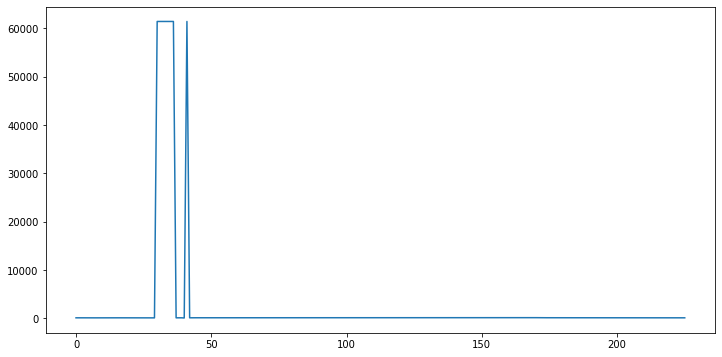

In [82]:
# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df2["Number"],df2["Lifetouch Heart Rate"])
plt.show()

In [83]:
df2 = df2[(df2['Lifetouch Heart Rate'] > 40) & (df2['Lifetouch Heart Rate'] < 200)]

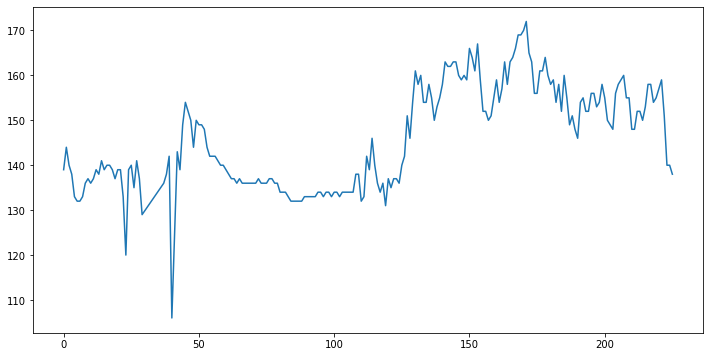

In [84]:
# plot time series
plt.figure(figsize=(12, 6))
plt.plot(df2["Number"],df2["Lifetouch Heart Rate"])
plt.show()


In [85]:
# single exponential smoothing
single_fit = SimpleExpSmoothing(df2["Lifetouch Heart Rate"]).fit()

# double exponential smoothing
double_fit = Holt(df2["Lifetouch Heart Rate"]).fit()

# triple exponential smoothing
tripple_fit = ExponentialSmoothing(df2["Lifetouch Heart Rate"], trend="mul",seasonal="mul", seasonal_periods=20).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


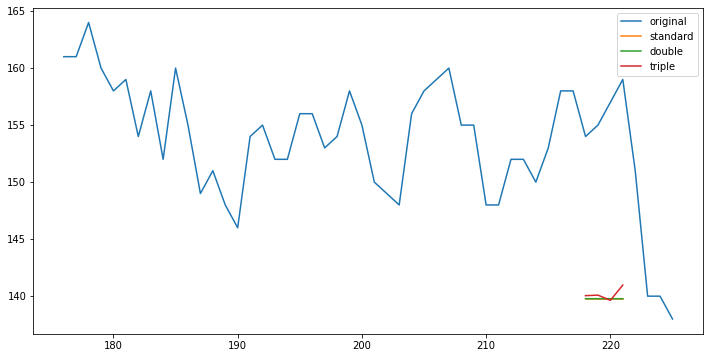

In [86]:
# future predictions
predictions_single_fit = single_fit.forecast(4)
predictions_double_fit = double_fit.forecast(4)
predictions_tripple_fit = tripple_fit.forecast(4)

# plot data
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.plot(df2["Number"][-50:], df2["Lifetouch Heart Rate"][-50:], label='original')

plt.plot(predictions_single_fit, label='standard')
plt.plot(predictions_double_fit, label='double')
plt.plot(predictions_tripple_fit, label='triple')

plt.legend()
plt.show()

In [87]:
print(single_fit.summary())

                        SimpleExpSmoothing Model Results                        
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:               SimpleExpSmoothing   SSE                           5035.334
Optimized:                         True   AIC                            688.463
Trend:                             None   BIC                            695.232
Seasonal:                          None   AICC                           688.651
Seasonal Periods:                  None   Date:                 Thu, 09 Feb 2023
Box-Cox:                          False   Time:                         11:54:42
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5888135                alpha                 True
initial_level              140.090

In [88]:
print(double_fit.summary())

                               Holt Model Results                               
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:                             Holt   SSE                           5035.333
Optimized:                         True   AIC                            692.463
Trend:                         Additive   BIC                            706.001
Seasonal:                          None   AICC                           692.861
Seasonal Periods:                  None   Date:                 Thu, 09 Feb 2023
Box-Cox:                          False   Time:                         11:55:04
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.5888212                alpha                 True
smoothing_trend           5.1334e-

In [89]:
print(tripple_fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:     Lifetouch Heart Rate   No. Observations:                  218
Model:             ExponentialSmoothing   SSE                           4728.206
Optimized:                         True   AIC                            718.744
Trend:                   Multiplicative   BIC                            799.972
Seasonal:                Multiplicative   AICC                           726.094
Seasonal Periods:                    20   Date:                 Thu, 09 Feb 2023
Box-Cox:                          False   Time:                         11:55:24
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.5994244                alpha                 True
smoothing_trend          